In [51]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [52]:
import os
os.listdir('/content/gdrive/My Drive/Colab Notebooks/Data_sets/project2/')

['mapping.csv',
 'companies.txt',
 'rounds2.csv',
 'rounds_clean.csv',
 'companies_clean.csv',
 'master_df.csv']

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

rounds = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Data_sets/project2/rounds2.csv", encoding = "ISO-8859-1")
companies = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Data_sets/project2/companies.txt", sep="\t", encoding = "ISO-8859-1")

In [5]:
rounds.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


In [6]:
print(rounds.info(), "\n")
print(rounds.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB
None 

(114949, 6)


In [7]:
companies.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


In [8]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [11]:
companies['permalink'].unique().shape

(66368,)

In [12]:
companies['permalink'] = companies['permalink'].str.lower()
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [13]:
companies['permalink'].unique().shape

(66368,)

In [14]:
len(rounds.company_permalink.unique())


90247

In [15]:
rounds['company_permalink'] = rounds['company_permalink'].str.lower()
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [16]:
len(rounds.company_permalink.unique())

66370

In [0]:
## 2 extra are there 

In [18]:
rounds.loc[~rounds['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


In [20]:
import chardet
rawdata = open("/content/gdrive/My Drive/Colab Notebooks/Data_sets/project2/rounds2.csv", 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

Windows-1254


In [22]:
rounds_original = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Data_sets/project2/rounds2.csv", encoding="Windows-1254")

UnicodeDecodeError: ignored

In [0]:
#https://stackoverflow.com/questions/45871731/removing-special-characters-in-a-pandas-dataframe.

In [24]:
rounds['company_permalink'] = rounds.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds.loc[~rounds['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
77,/organization/10north,/funding-round/b41ff7de932f8b6e5bbeed3966c0ed6a,equity_crowdfunding,NaN,12-08-2014,NaN
729,/organization/51wofang-,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.0
2670,/organization/adslinked,/funding-round/449ae54bb63c768c232955ca6911dee4,seed,NaN,29-09-2014,100000.0
3166,/organization/aesthetic-everything-social-network,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,NaN,12-10-2014,NaN
3291,/organization/affluent-attach-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15-10-2014,100000.0
4568,/organization/allgu-outlet,/funding-round/49e8a9b54ed19c8505ca92dc031a8e9c,venture,NaN,17-03-2015,1400000.0
8097,/organization/asiansbook,/funding-round/3f243ab92b4fe397d41b4734a17ca5f0,seed,NaN,15-09-2014,100000.0
8652,/organization/atlye-gri,/funding-round/75bdeacd95a647108aa4bc480e77894d,grant,NaN,01-11-2012,13940.0
9784,/organization/axgaz,/funding-round/511a41181aaf193bbd419babfb8d66e9,venture,NaN,06-07-2015,4094392.0
14311,/organization/boral-bikes-incorporated,/funding-round/be79575bf4b5b5d6fa64670800a3ca5e,seed,NaN,26-02-2015,NaN


In [25]:
len(rounds.company_permalink.unique())

66368

In [0]:
companies['permalink'] = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')


In [27]:
companies.loc[~companies['permalink'].isin(rounds['company_permalink']), :]


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [0]:
#rounds.to_csv("/content/gdrive/My Drive/Colab Notebooks/Data_sets/project2/rounds_clean.csv", sep=',', index=False)

# write companies file
#companies.to_csv("/content/gdrive/My Drive/Colab Notebooks/Data_sets/project2/companies_clean.csv", sep='\t', index=False)

In [0]:
rounds = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Data_sets/project2/rounds_clean.csv", encoding = "ISO-8859-1")
companies = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Data_sets/project2/companies_clean.csv", sep="\t", encoding = "ISO-8859-1")

In [30]:
print(len(companies.permalink.unique()))
print(len(rounds.company_permalink.unique()))
print(len(rounds.loc[~rounds['company_permalink'].isin(companies['permalink']), :]))

66368
66368
0


In [31]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [32]:
rounds.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [33]:
master = pd.merge(companies, rounds, how="inner", left_on="permalink", right_on="company_permalink")
master.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


In [0]:
# removing redundant columns
master =  master.drop(['company_permalink'], axis=1) 

In [35]:
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [36]:
master = master.drop(['funding_round_code', 'homepage_url', 'founded_at', 'state_code', 'region', 'city'], axis=1)
master.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [37]:
# removing NaNs in raised_amount_usd
master = master[~np.isnan(master['raised_amount_usd'])]
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [42]:
(master['country_code'])[:3]

0    IND
2    USA
3    NaN
Name: country_code, dtype: object

In [43]:
master['country_code'].value_counts()

USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
FRA     1451
ISR     1364
ESP     1074
DEU     1042
AUS      649
RUS      588
IRL      563
SWE      560
SGP      546
NLD      532
JPN      485
BRA      483
ITA      483
CHE      437
CHL      432
KOR      432
FIN      382
DNK      314
ARG      297
BEL      293
HKG      250
TUR      196
NOR      191
BGR      190
MEX      189
       ...  
MAR        2
NIC        2
ZWE        2
BLZ        2
CIV        2
DOM        2
ZMB        2
MCO        2
KAZ        2
QAT        1
BLM        1
LAO        1
KNA        1
MNE        1
OMN        1
SYC        1
PSE        1
MKD        1
BRB        1
DMA        1
TGO        1
IRN        1
UZB        1
SEN        1
PRY        1
GGY        1
GRD        1
DZA        1
SOM        1
HND        1
Name: country_code, Length: 134, dtype: int64

In [44]:
100*(master['country_code'].value_counts()/len(master.index))

USA    65.342937
GBR     5.285439
CAN     2.754873
CHN     2.029297
IND     1.736539
FRA     1.528028
ISR     1.436409
ESP     1.131014
DEU     1.097316
AUS     0.683453
RUS     0.619215
IRL     0.592887
SWE     0.589728
SGP     0.574985
NLD     0.560242
JPN     0.510747
BRA     0.508641
ITA     0.508641
CHE     0.460199
CHL     0.454933
KOR     0.454933
FIN     0.402279
DNK     0.330669
ARG     0.312767
BEL     0.308554
HKG     0.263272
TUR     0.206405
NOR     0.201139
BGR     0.200086
MEX     0.199033
         ...    
MAR     0.002106
NIC     0.002106
ZWE     0.002106
BLZ     0.002106
CIV     0.002106
DOM     0.002106
ZMB     0.002106
MCO     0.002106
KAZ     0.002106
QAT     0.001053
BLM     0.001053
LAO     0.001053
KNA     0.001053
MNE     0.001053
OMN     0.001053
SYC     0.001053
PSE     0.001053
MKD     0.001053
BRB     0.001053
DMA     0.001053
TGO     0.001053
IRN     0.001053
UZB     0.001053
SEN     0.001053
PRY     0.001053
GGY     0.001053
GRD     0.001053
DZA     0.0010

In [0]:
## most of investment have happen in american country

In [46]:
# removing rows with missing country_codes
master = master[~pd.isnull(master['country_code'])]

# look at missing values
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                  0.00
name                       0.00
category_list              0.65
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [47]:
# removing rows with missing category_list values
master = master[~pd.isnull(master['category_list'])]

# look at missing values
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [0]:
master.to_csv("/content/gdrive/My Drive/Colab Notebooks/Data_sets/project2/master_df.csv", sep=',', index=False)

In [49]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 9 columns):
permalink                  88529 non-null object
name                       88528 non-null object
category_list              88529 non-null object
status                     88529 non-null object
country_code               88529 non-null object
funding_round_permalink    88529 non-null object
funding_round_type         88529 non-null object
funded_at                  88529 non-null object
raised_amount_usd          88529 non-null float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


In [50]:
# after missing value treatment, approx 77% observations are retained
100*(len(master.index) / len(rounds.index))

77.01589400516751

In [55]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Data_sets/project2/master_df.csv", sep=",", encoding="ISO-8859-1")
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
3,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0


In [0]:
df = df[(df.funding_round_type == "venture") | 
        (df.funding_round_type == "angel") | 
        (df.funding_round_type == "seed") | 
        (df.funding_round_type == "private_equity") ]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


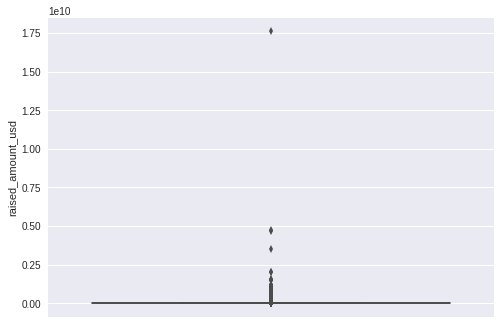

In [58]:
sns.boxplot(y=df['raised_amount_usd'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


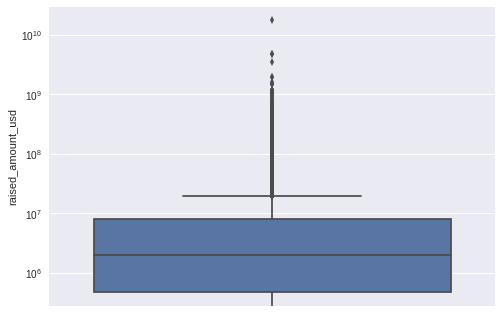

In [59]:
sns.boxplot(y=df['raised_amount_usd'])
plt.yscale('log')
plt.show()

In [60]:
df['raised_amount_usd'].describe()

count    7.512400e+04
mean     9.519475e+06
std      7.792778e+07
min      0.000000e+00
25%      4.705852e+05
50%      2.000000e+06
75%      8.000000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


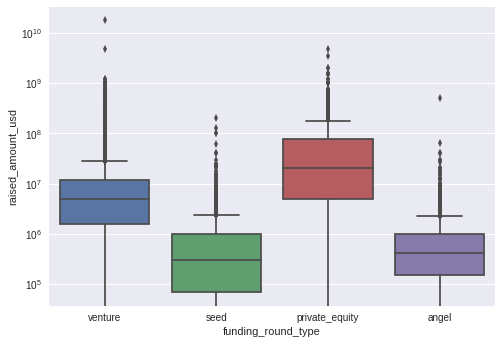

In [61]:
# comparing summary stats across four categories
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=df)
plt.yscale('log')
plt.show()

In [62]:
df.pivot_table(values='raised_amount_usd', columns='funding_round_type', aggfunc=[np.median, np.mean])

median                                      \
funding_round_type     angel private_equity      seed    venture   
raised_amount_usd   414906.0     20000000.0  300000.0  5000000.0   

                             mean                                              
funding_round_type          angel private_equity           seed       venture  
raised_amount_usd   971573.891136   7.393849e+07  747793.682484  1.172422e+07

In [63]:
df.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               414906.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

In [64]:
# filter the df for private equity type investments
df = df[df.funding_round_type=="venture"]

# group by country codes and compare the total funding amounts
country_wise_total = df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
print(country_wise_total)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
SWE    3.145857e+09
NLD    2.903876e+09
CHE    2.801560e+09
SGP    2.793918e+09
ESP    1.827622e+09
BRA    1.785818e+09
IRL    1.669286e+09
RUS    1.570426e+09
AUS    1.319029e+09
DNK    1.228311e+09
FIN    1.043200e+09
BEL    1.030840e+09
NOR    9.536361e+08
KOR    8.919883e+08
MYS    8.830588e+08
HKG    7.812670e+08
TWN    6.239795e+08
AUT    5.833607e+08
TUR    5.590975e+08
ITA    4.882894e+08
NZL    4.483164e+08
           ...     
KWT    1.400000e+07
LIE    1.309172e+07
MNE    1.220000e+07
SVN    1.201751e+07
BGR    1.130000e+07
KAZ    1.100000e+07
GRC    1.074378e+07
BAH    8.900000e+06
TTO    8.500000e+06
SVK    8.241062e+06
BGD    7.002000e+06
LBN    6.455000e+06
GGY    3.960000e+06
TUN    3.920000e+06
SEN    2.860000e+06
HRV    2.633669e+06
UGA    2.500000e+06
PER    2.469270e+06
BWA    

In [65]:
top_9_countries = country_wise_total[:9]
top_9_countries

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

In [66]:
df = df[(df.country_code=='USA') | (df.country_code=='GBR') | (df.country_code=='IND')]
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


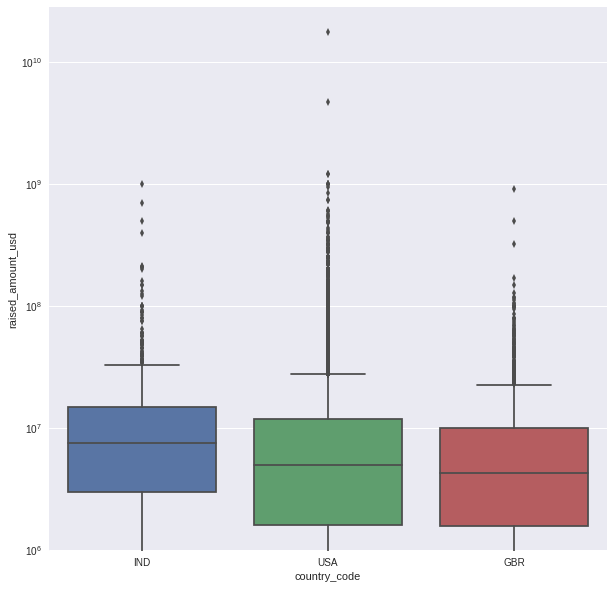

In [67]:
# boxplot to see distributions of funding amount across countries
plt.figure(figsize=(10, 10))
sns.boxplot(x='country_code', y='raised_amount_usd', data=df)
plt.yscale('log')
plt.show()

In [70]:
# extracting the main category
df.loc[:, 'main_category'] = df['category_list'].apply(lambda x: x.split("|")[0])
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps


In [71]:
# drop the category_list column
df = df.drop('category_list', axis=1)
df.head(2)

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics


In [72]:
# read mapping file
mapping = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Data_sets/project2/mapping.csv", sep=",")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [73]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [74]:
mapping = mapping[~pd.isnull(mapping['category_list'])]
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [0]:
mapping['category_list'] = mapping['category_list'].str.lower()
df['main_category'] = df['main_category'].str.lower()

In [76]:
df[~df['main_category'].isin(mapping['category_list'])]

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics
47,/organization/100plus,100Plus,acquired,USA,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.0,analytics
136,/organization/1world-online,1World Online,operating,USA,/funding-round/32936e588a134502712877150198a0b3,venture,13-08-2015,2500000.0,analytics
137,/organization/1world-online,1World Online,operating,USA,/funding-round/4e30bd5c85d8163239a3479ec979647a,venture,01-12-2013,500000.0,analytics
138,/organization/1world-online,1World Online,operating,USA,/funding-round/a349bfd7a8d48cfc8b9fdb79480dea7f,venture,02-07-2013,1000000.0,analytics
187,/organization/24-7-card,24/7 Card,closed,USA,/funding-round/0c38194ff2035185c96155dfad18f3bd,venture,21-12-2011,3452941.0,finance
590,/organization/6th-wave-innovations-corporation,6th Wave Innovations Corporation,operating,USA,/funding-round/75d128ac40f9e541a1a11786a47c2952,venture,08-07-2015,2569720.0,nanotechnology
597,/organization/7-billion-people,7 Billion People,closed,USA,/funding-round/58959ed2be7b14abd6beeb20c9eb17ca,venture,13-07-2012,2368902.0,analytics


In [77]:
mapping[~mapping['category_list'].isin(df['main_category'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
59,big data a0lytics,0,0,0,0,0,0,0,0,1
64,biomass power generation,0,0,1,0,0,0,0,0,0
69,boating industry,1,0,0,0,0,0,0,0,0
77,building owners,0,0,0,0,0,0,1,0,0
79,business a0lytics,0,0,0,0,0,0,0,0,1


In [78]:
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0', 'na'))
print(mapping['category_list'])

1                                      3d
2                             3d printing
3                           3d technology
4                              accounting
5                        active lifestyle
6                            ad targeting
7                      advanced materials
8                        adventure travel
9                             advertising
10                  advertising exchanges
11                   advertising networks
12                  advertising platforms
13                                 advice
14                              aerospace
15                            agriculture
16                  air pollution control
17                             algorithms
18                            all markets
19                           all students
20                   alternative medicine
21                                 alumni
22                              analytics
23                                android
24                                

In [79]:
# merge the dfs
df = pd.merge(df, mapping, how='inner', left_on='main_category', right_on='category_list')
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,media,0,0,0,1,0,0,0,0,0


In [80]:
df = df.drop('category_list', axis=1)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,0,0,0,1,0,0,0,0,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 38787
Data columns (total 18 columns):
permalink                                  38788 non-null object
name                                       38788 non-null object
status                                     38788 non-null object
country_code                               38788 non-null object
funding_round_permalink                    38788 non-null object
funding_round_type                         38788 non-null object
funded_at                                  38788 non-null object
raised_amount_usd                          38788 non-null float64
main_category                              38788 non-null object
Automotive & Sports                        38788 non-null int64
Blanks                                     38788 non-null int64
Cleantech / Semiconductors                 38788 non-null int64
Entertainment                              38788 non-null int64
Health                                     38788 

In [82]:
value_vars = df.columns[9:18]

id_vars = np.setdiff1d(df.columns, value_vars)

print(value_vars, "\n")
print(id_vars)

Index(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object') 

['country_code' 'funded_at' 'funding_round_permalink' 'funding_round_type'
 'main_category' 'name' 'permalink' 'raised_amount_usd' 'status']


In [83]:
long_df = pd.melt(df, 
        id_vars=list(id_vars), 
        value_vars=list(value_vars))

long_df.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,permalink,raised_amount_usd,status,variable,value
0,IND,05-01-2015,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,media,#fame,/organization/-fame,10000000.0,operating,Automotive & Sports,0
1,GBR,06-10-2015,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,media,90min,/organization/90min,15000000.0,operating,Automotive & Sports,0
2,GBR,07-05-2013,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,media,90min,/organization/90min,5800000.0,operating,Automotive & Sports,0
3,GBR,26-03-2014,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,media,90min,/organization/90min,18000000.0,operating,Automotive & Sports,0
4,USA,06-08-2014,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,media,All Def Digital,/organization/all-def-digital,5000000.0,operating,Automotive & Sports,0


In [0]:
long_df = long_df[long_df['value']==1]
long_df = long_df.drop('value', axis=1)

In [0]:
long_df = long_df.rename(columns={'variable': 'sector'})

In [0]:
df = long_df[(long_df['raised_amount_usd'] >= 5000000) & (long_df['raised_amount_usd'] <= 15000000)]


In [87]:
df.groupby(['country_code', 'sector']).raised_amount_usd.agg(['count', 'sum'])

count           sum
country_code sector                                                      
GBR          Automotive & Sports                         16  1.670516e+08
             Cleantech / Semiconductors                 130  1.163990e+09
             Entertainment                               56  4.827847e+08
             Health                                      24  2.145375e+08
             Manufacturing                               42  3.619403e+08
             News, Search and Messaging                  73  6.157462e+08
             Others                                     147  1.283624e+09
             Social, Finance, Analytics, Advertising    133  1.089404e+09
IND          Automotive & Sports                         13  1.369000e+08
             Cleantech / Semiconductors                  20  1.653800e+08
             Entertainment                               33  2.808300e+08
             Health                                      19  1.677400e+08
             Manufacturing                               21  2.009000e+08
             News, Search and Messaging                  52  4.338345e+08
             Others                                     110  1.013410e+09
             Social, Finance, Analytics, Advertising     60  5.505496e+08
USA          Automotive & Sports                        167  1.454104e+09
             Cleantech / Semiconductors                2350  2.163343e+10
             Entertainment                              591  5.099198e+09
             Health                                     909  8.211859e+09
             Manufacturing                              799  7.258553e+09
             News, Search and Messaging                1583  1.397157e+10
             Others                                    2950  2.632101e+10
             Social, Finance, Analytics, Advertising   2714  2.380738e+10

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


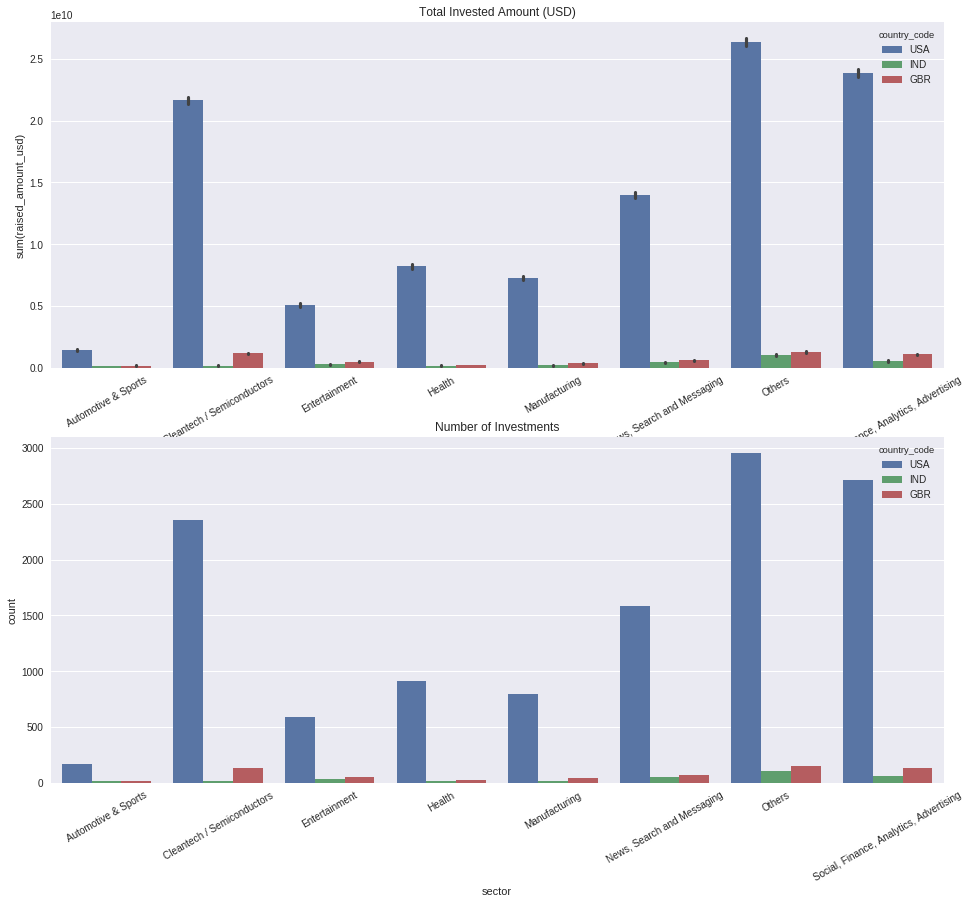

In [88]:
# plotting sector-wise count and sum of investments in the three countries
plt.figure(figsize=(16, 14))

plt.subplot(2, 1, 1)
p = sns.barplot(x='sector', y='raised_amount_usd', hue='country_code', data=df, estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Total Invested Amount (USD)')

plt.subplot(2, 1, 2)
q = sns.countplot(x='sector', hue='country_code', data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Number of Investments')


plt.show()